In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import KDTree, cKDTree
from sklearn.neighbors import NearestNeighbors
import numpy as np
import freud as freud

In [2]:
def block_recognition(file):
    a=False # first block'<'
    b=False # second block '<'
    c=False # third block '>'
    d=False # fourth block'>'
    i=0
    O_boundary=pd.DataFrame((), columns=[])
    Oh=[]
    aOh1=[]
    Ol=[]
    aOl1=[]
    bOh=[]
    bOl=[]
    block=[]
    l=0
    check=True
    ## Because the building block is constructing the structure in a such way that 
    while i<len(file):
        if l<32:
            
            
            # Check for first '<' and print'<' if there is and a=True
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k

           #search for second '<' and print '<' if found b=True 
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k

            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                c=True
                check=False
                k=i+8
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                i=k
            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                c=True
                check=False
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                k=i+8
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k

            #Look if the cell is fully completed, i.e. if '<''<' and '>' '>' has been found
            if a==True and b==True and c==True and d==True :
                a=False
                b=False
                c=False
                d=False
                l+=1
                check=True
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                block+=['water']
                i+=1
            else:
                
                if check==False:
                    i+=1
                    block+=['bridge']
                if check==True: 
                    block+=['-']
                    #print(file.iloc[i]['type'])
                    i+=1
        
        if l==32:
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                check=True
                block+=['water']
                i+=1
            else:
                i+=1
                block+=['-']
    ### Addin the collumn to define the block 
    file['block']=block

    #adding a collumn that describe to which cell/cell boundary the item belongs 
    # if 0 it belong to upper or lower layer

    O_boundary['Ohid']=Oh
    O_boundary['Olid']=Ol
    return O_boundary, file


In [3]:
def O_boundarysearch(final, O_boundary): 
    Oh=[]
    Ol=[]
    for index, boundary in O_boundary.iterrows():
        for index, point in final.iterrows():
            if float(point['id'])==boundary['Ohid']: 
                Oh+=[[point['x'],point['y'],point['z']]]
            if float(point['id'])==boundary['Olid']: 
                Ol+=[[point['x'],point['y'],point['z']]]
    O_boundary['Oh']=Oh
    O_boundary['Ol']=Ol
    return O_boundary



In [4]:
def normal_plane(point1, point2, point3,point4):
    vector1=point2-point1
    vector2=(point3+point4)/2-point1
    n=np.cross(vector1,vector2)
    d=-(n@point1)
    plane=[n[0],n[1],n[2],d]
    return np.array(plane)

In [5]:
def row(final,file):
    i=0
    final['cell']=-1
    final['row']=-1
    zi=[]
    block=[]
    for i in range(0,len(final)):
        block+=[file.iloc[int(final.at[i,'id'])-1]['block']]
        if final.iloc[i]['z']>27.9873670000/2:
            zi+=[1]
        if final.iloc[i]['z']<=27.9873670000/2:
            zi+=[0]
    final['zi']=zi
    #print(block)
    final['block']=block
    return final

In [21]:
def read_box(file, i): 
    file=pd.read_csv(file, delim_whitespace=True, skiprows=i+4, nrows=3, names=['xy','xz','yz'], decimal='.')
    display(file)
    Lx=file.iloc[0]['xz']-file.iloc[0]['xy']
    Ly=file.iloc[1]['xz']-file.iloc[1]['xy']
    Lz=file.iloc[2]['xz']-file.iloc[2]['xy']
    xy=file.iloc[0]['yz']
    xz=file.iloc[1]['yz']
    yz=file.iloc[2]['yz']
    a,b,c=[Lx,0,0],[xy,Ly,0],[xz,yz,Lz]
    box = freud.box.Box.from_box([Lx,Ly,Lz,xy,xz,yz])
    #print(box)
    return box, np.array(a), np.array(b), np.array(c)

In [22]:
def cell_init(file):
    file=pd.read_csv(file, delim_whitespace=True, skiprows=8, nrows=4, names=['xy','xz','yz', 'u', 'v', 'w'], decimal='.')
    display(file)
    Lx=file.iloc[0]['xz']-file.iloc[0]['xy']
    Ly=file.iloc[1]['xz']-file.iloc[1]['xy']
    Lz=file.iloc[2]['xz']-file.iloc[2]['xy']
    xy=float(file.iloc[3]['xy'])
    xz=float(file.iloc[3]['xz'])
    yz=float(file.iloc[3]['yz'])
    a,b,c=[Lx,0,0],[xy,Ly,0],[xz,yz,Lz]
    #print(box)
    box = freud.box.Box.from_box([Lx,Ly,Lz,xy,xz,yz])    
    return box, np.array(a),np.array(b),np.array(c)

In [23]:
def rhoO(rows, initial,n, file):
    points=[]
    charge=[]
    #display(rows)
    ### Find all the points of the interlayer of interest (here 1 or 0)
    ### And create a dataframe called df that compute the charge the id and the position of all that points
    box, a, b, c=cell_init(file)
    for index, point in rows.iterrows():    
            if point['zi']==0 and point['block']=='-':
                x=float(point['x'])
                y=float(point['y'])
                z=float(point['z'])
                point2=np.array([x,y,z])
                point2-=a/2
                point2-=b/2
                point2-=c/2
                points+=[point2]
                charge+=[initial.iloc[int(point['id'])]['charges']]
    dfi=pd.DataFrame({'x':x, 'y':y, 'z':z, 'charge':charge})

    aq = freud.locality.AABBQuery(box, points)
    distances = []
    query_result = aq.query(points, dict(num_neighbors=n))
    nlist = query_result.toNeighborList()            
    for bond in query_result:
            distances.append([bond[2], bond[0],bond[1]])
    rho0=0
    rhoi=0
    for i in range(len(distances)):
        if distances[i][0]!=0:
            rhoi+=1/distances[i][0]*dfi.iloc[distances[i][2]]['charge']
    rhoi=rhoi/(n-1)
    rho0=rhoi/(len(distances)/(n-1))

    return rho0


In [27]:


gamma_cycle=[]
timestep=[]
n=5
########
for k in range(4):
    df=pd.read_csv('data/output/timestep%d.txt'%k, delim_whitespace=True)
    df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
    ###################################
    ###################################
    file='data/quantitative/%dcycle/data_lmpo0001.lmp'%k
    initial=pd.read_csv('data/quantitative/%dcycle/data_lmpo0001.lmp'%k, delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charges','x','y','z','cell', 'block','zi'])
    O_boundaryi, initial=block_recognition(initial)
    df=pd.read_csv('data/output/timestep%d.txt'%k, delim_whitespace=True)
    df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
    final=initial
    O_boundaryf=O_boundarysearch(final, O_boundaryi)
    rows=row(final, initial)
    rho0=rhoO(rows,initial,n, file)
    #print(rho0)
    ###################################
    ###################################
    
    ##################
    gamma_t=[1]
    rho=[rho0]
    timestep_t=[-1]
    ##################
    for index, i in df.iterrows():
        ligne=i['atoms']
        time=i['timestep']
        print(time)
        box,a,b,c=read_box('data/quantitative/%dcycle/all.dump'%k, time)
        final=pd.read_csv('data/quantitative/%dcycle/all.dump'%k, delim_whitespace=True, skiprows=ligne, nrows=2025, names=['id','type','x','y','z','vx','vy','vz','fx','fy','fz','cell', 'block','zi'])
        final_time=pd.read_csv('data/quantitative/%dcycle/all.dump'%k, delim_whitespace=True, skiprows=time, nrows=1, names=['timestep'])
        timestep_t+=[final_time.iloc[0]['timestep']]
        O_boundaryf=O_boundarysearch(final, O_boundaryi)
        rows=row(final, initial)
        #display(rows)
        points=[]
        charge=[]
        idl=[]
        
        ### Find all the points of the interlayer of interest (here 1 or 0)
        ### And create a dataframe called df that compute the charge the id and the position of all that points
        for index, point in rows.iterrows():    
            if point['zi']==0 and point['block']=='-':
                x=float(point['x'])
                y=float(point['y'])
                z=float(point['z'])
                point2=np.array([x,y,z])
                point2-=a/2
                point2-=b/2
                point2-=c/2
                points+=[point2]
                charge+=[initial.iloc[int(point['id'])]['charges']]
        dfi=pd.DataFrame({'point':points, 'charge':charge})
        #display(df)
        # We shift the system by half the box lengths to match 
        # freud coordinate system, which is centered at the origin.
        # Since all methods support periodicity, this shift is simply
        # for consistency but does not affect any analyses.
        query_points = points
        aq = freud.locality.AABBQuery(box, points)
        distances = []
        query_result = aq.query(points, dict(num_neighbors=n))
        nlist = query_result.toNeighborList()
        indices=[]
        #print(nlist)
        for bond in query_result:
            distances.append([bond[2], bond[0],bond[1]])
        #for (i, j) in nlist:
         #   distances.append([np.linalg.norm(box.wrap(query_points[i] - points[j])),i, j])
        #print(distances)
        rhot=0
        l=0
        rhoi=0
        for j in range(len(distances)): 
            if distances[j][0]!=0:
                rhoi+=1/distances[j][0]*dfi.iloc[distances[j][2]]['charge']###Warning
            #print(distances[j][2])
            #print(dfi.iloc[distances[j][2]])
        rhot=rhoi/(len(distances)/(n-1))/(n-1) ### To verify
        #print(rhot)
        gamma_t+=[rhot/rho0]
    gamma_cycle+=[gamma_t]
    timestep+=[timestep_t]

,xy,xz,yz,u,v,w
0,0.00000,26.940800,xlo,xhi,NaN,NaN
1,0.00000,24.838084,ylo,yhi,NaN,NaN
2,0.00000,27.987367,zlo,zhi,NaN,NaN
3,-16.28518,1.407540,-12.4191160000,xy,xz,yz


1


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


2035


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


4069


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


6103


,xy,xz,yz
0,-17.099683,29.119053,-17.151885
1,-11.942327,24.821451,2.230455
2,0.139973,27.847394,-11.958960


8137


,xy,xz,yz
0,-17.032325,29.089324,-17.076169
1,-12.071773,24.866419,2.192368
2,0.289888,27.697479,-12.043438


10171


,xy,xz,yz
0,-17.278375,29.882536,-17.294417
1,-12.244203,24.848158,2.957779
2,0.337517,27.649850,-12.234129


12205


,xy,xz,yz
0,-17.169115,29.620453,-17.254529
1,-12.342377,24.875849,2.765068
2,0.286206,27.701161,-12.304612


14239


,xy,xz,yz
0,-17.116740,29.425681,-17.161097
1,-12.188401,24.872677,2.529238
2,0.292062,27.695305,-12.153808


16273


,xy,xz,yz
0,-17.076649,29.630562,-17.152107
1,-12.359607,24.877149,2.765220
2,0.264650,27.722717,-12.320541


18307


,xy,xz,yz
0,-17.104546,29.394925,-17.165924
1,-12.218664,24.872709,2.515502
2,0.298950,27.688417,-12.184039


20341


,xy,xz,yz
0,-17.065638,29.497471,-17.128539
1,-12.025624,24.873218,2.619572
2,0.211807,27.775560,-11.990490


22375


,xy,xz,yz
0,-16.988421,29.360372,-17.040822
1,-12.239244,24.902918,2.471973
2,0.255076,27.732291,-12.174410


24409


,xy,xz,yz
0,-17.028490,29.359713,-17.114213
1,-12.196297,24.888902,2.504637
2,0.246469,27.740898,-12.145479


26443


,xy,xz,yz
0,-17.116116,29.597316,-17.177142
1,-11.965322,24.917897,2.717542
2,0.291734,27.695633,-11.885510


28477


,xy,xz,yz
0,-17.211164,29.503037,-17.210514
1,-11.969301,24.843181,2.561586
2,0.294464,27.692903,-11.964204


30511


,xy,xz,yz
0,-17.029174,29.722127,-17.097830
1,-12.199372,24.888664,2.849983
2,0.228618,27.758749,-12.148792


32545


,xy,xz,yz
0,-17.175397,29.724509,-17.233491
1,-12.077476,24.892632,2.841804
2,0.292044,27.695323,-12.022928


34579


,xy,xz,yz
0,-17.189975,29.837264,-17.192145
1,-11.827469,24.880218,2.898634
2,0.292038,27.695329,-11.785335


36613


,xy,xz,yz
0,-17.250443,29.715819,-17.301609
1,-12.334141,24.849783,2.826184
2,0.191305,27.796062,-12.322442


38647


,xy,xz,yz
0,-17.015251,29.539973,-17.086081
1,-12.035710,24.872332,2.670003
2,0.227421,27.759946,-12.001462


40681


,xy,xz,yz
0,-17.175449,29.953253,-17.202490
1,-11.901511,24.856665,3.039495
2,0.279667,27.707700,-11.882931


42715


,xy,xz,yz
0,-17.127218,29.957505,-17.145577
1,-11.897247,24.841234,3.035065
2,0.267828,27.719539,-11.894096


44749


,xy,xz,yz
0,-17.189851,29.733224,-17.179911
1,-11.848350,24.820879,2.782484
2,0.267170,27.720197,-11.865555


,xy,xz,yz,u,v,w
0,0.00000,26.940800,xlo,xhi,NaN,NaN
1,0.00000,24.838084,ylo,yhi,NaN,NaN
2,0.00000,27.987367,zlo,zhi,NaN,NaN
3,-16.28518,1.407540,-12.4191160000,xy,xz,yz


1


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


2035


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


4069


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


6103


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


8137


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


10171


,xy,xz,yz
0,-17.053397,28.949436,-17.036493
1,-12.550395,24.908016,1.991732
2,0.394943,27.592424,-12.480463


12205


,xy,xz,yz
0,-17.047187,28.998447,-17.033965
1,-12.653572,24.893122,2.044425
2,0.349677,27.637690,-12.598534


14239


,xy,xz,yz
0,-17.182332,29.057462,-17.149954
1,-12.436576,24.870076,2.084285
2,0.320837,27.666530,-12.404585


16273


,xy,xz,yz
0,-17.192496,28.968936,-17.172051
1,-12.490973,24.872893,2.007691
2,0.353586,27.633781,-12.456164


18307


,xy,xz,yz
0,-17.161498,29.037631,-17.164993
1,-12.599764,24.868868,2.100325
2,0.330552,27.656815,-12.568980


20341


,xy,xz,yz
0,-17.131283,28.829186,-17.133665
1,-12.714978,24.843402,1.890768
2,0.367381,27.619986,-12.709660


22375


,xy,xz,yz
0,-17.054328,28.931763,-17.047863
1,-12.590153,24.881411,1.984498
2,0.328997,27.658370,-12.546826


24409


,xy,xz,yz
0,-17.035933,29.117929,-17.027250
1,-12.554465,24.896471,2.168446
2,0.329946,27.657421,-12.496078


26443


,xy,xz,yz
0,-17.039768,28.909250,-17.047070
1,-12.390750,24.859116,1.975752
2,0.368866,27.618501,-12.369718


28477


,xy,xz,yz
0,-17.114850,28.912401,-17.101555
1,-12.567233,24.906311,1.958306
2,0.392454,27.594913,-12.499006


30511


,xy,xz,yz
0,-17.080803,28.968884,-17.063796
1,-12.258959,24.804524,2.011077
2,0.312051,27.675316,-12.292519


32545


,xy,xz,yz
0,-17.136287,28.961682,-17.137463
1,-12.348628,24.849524,2.022058
2,0.345960,27.641407,-12.337189


34579


,xy,xz,yz
0,-17.123899,28.751488,-17.084884
1,-12.653620,24.852235,1.771673
2,0.315525,27.671842,-12.639469


36613


,xy,xz,yz
0,-17.071261,28.809208,-17.058725
1,-12.304795,24.830346,1.855872
2,0.263182,27.724185,-12.312532


38647


,xy,xz,yz
0,-17.164632,28.906252,-17.151606
1,-12.327284,24.866301,1.952426
2,0.300735,27.686632,-12.299067


40681


,xy,xz,yz
0,-16.997858,28.771684,-17.019498
1,-12.498385,24.901199,1.852524
2,0.308568,27.678799,-12.435270


42715


,xy,xz,yz
0,-16.916959,28.862723,-16.936644
1,-12.557756,24.881860,1.941609
2,0.343198,27.644169,-12.513980


44749


,xy,xz,yz
0,-17.009651,28.956386,-17.032556
1,-12.462287,24.886288,2.038491
2,0.308968,27.678399,-12.414083


46783


,xy,xz,yz
0,-16.921667,29.016297,-16.937369
1,-12.369553,24.854538,2.091198
2,0.365412,27.621955,-12.353100


48817


,xy,xz,yz
0,-17.234736,28.925518,-17.220873
1,-12.590181,24.871948,1.970855
2,0.332461,27.654906,-12.556316


,xy,xz,yz,u,v,w
0,0.00000,26.940800,xlo,xhi,NaN,NaN
1,0.00000,24.838084,ylo,yhi,NaN,NaN
2,0.00000,27.987367,zlo,zhi,NaN,NaN
3,-16.28518,1.407540,-12.4191160000,xy,xz,yz


1


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


2035


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


4069


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


6103


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


8137


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


10171


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


12205


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


14239


,xy,xz,yz
0,-16.959545,29.064928,-17.007109
1,-12.290271,24.861995,2.171691
2,0.226565,27.760802,-12.266360


16273


,xy,xz,yz
0,-17.094061,29.135666,-17.122182
1,-12.150305,24.843966,2.222987
2,0.235421,27.751946,-12.144423


18307


,xy,xz,yz
0,-17.040327,29.325877,-17.069366
1,-12.117813,24.835249,2.414115
2,0.206643,27.780724,-12.120648


20341


,xy,xz,yz
0,-17.017673,29.286244,-17.067977
1,-12.067182,24.798723,2.395748
2,0.225931,27.761436,-12.106543


22375


,xy,xz,yz
0,-17.182940,29.301484,-17.179255
1,-12.519036,24.850905,2.356999
2,0.255078,27.732289,-12.506216


24409


,xy,xz,yz
0,-17.094636,29.181275,-17.088002
1,-12.189640,24.821926,2.233842
2,0.231567,27.755800,-12.205798


26443


,xy,xz,yz
0,-16.918438,29.139053,-16.969793
1,-12.358786,24.852322,2.249609
2,0.262143,27.725224,-12.344549


28477


,xy,xz,yz
0,-17.031660,28.912053,-17.076669
1,-12.582777,24.836924,2.016262
2,0.290188,27.697179,-12.583938


30511


,xy,xz,yz
0,-16.938758,29.192017,-16.981654
1,-12.395407,24.874917,2.294113
2,0.303540,27.683827,-12.358574


32545


,xy,xz,yz
0,-16.808941,28.947526,-16.887300
1,-12.277304,24.863197,2.085085
2,0.271191,27.716176,-12.252190


34579


,xy,xz,yz
0,-16.890886,28.895815,-16.992576
1,-12.333365,24.890178,2.056705
2,0.310419,27.676948,-12.281271


36613


,xy,xz,yz
0,-17.116742,28.976418,-17.116509
1,-12.310099,24.862195,2.035385
2,0.278470,27.708897,-12.285988


38647


,xy,xz,yz
0,-17.033436,29.183844,-17.032879
1,-12.490678,24.847328,2.242487
2,0.310811,27.676556,-12.481434


40681


,xy,xz,yz
0,-17.062829,29.211114,-17.067013
1,-12.442608,24.851140,2.274498
2,0.260729,27.726638,-12.429552


42715


,xy,xz,yz
0,-17.052944,29.128746,-17.069763
1,-12.424851,24.884778,2.204766
2,0.300997,27.686370,-12.378157


44749


,xy,xz,yz
0,-17.187965,29.159163,-17.187846
1,-12.319409,24.863986,2.218244
2,0.383096,27.604271,-12.293507


46783


,xy,xz,yz
0,-16.993001,29.064932,-17.032324
1,-12.552923,24.843194,2.163455
2,0.324206,27.663161,-12.547814


48817


,xy,xz,yz
0,-17.162930,29.078015,-17.158221
1,-12.105929,24.833474,2.132507
2,0.309083,27.678284,-12.110539


50851


,xy,xz,yz
0,-17.036641,29.137975,-17.068430
1,-12.187675,24.882831,2.228964
2,0.322238,27.665129,-12.142928


52885


,xy,xz,yz
0,-16.985513,29.110153,-16.993750
1,-11.958502,24.833311,2.177590
2,0.290758,27.696609,-11.963275


,xy,xz,yz,u,v,w
0,0.00000,26.940800,xlo,xhi,NaN,NaN
1,0.00000,24.838084,ylo,yhi,NaN,NaN
2,0.00000,27.987367,zlo,zhi,NaN,NaN
3,-16.28518,1.407540,-12.4191160000,xy,xz,yz


1


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


2035


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


4069


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


6103


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


8137


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


10171


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


12205


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


14239


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


16273


,xy,xz,yz
0,-16.285180,28.348340,-16.285180
1,-12.419116,24.838084,1.407540
2,0.000000,27.987367,-12.419116


18307


,xy,xz,yz
0,-16.855164,28.748454,-16.893500
1,-12.546479,24.823379,1.845990
2,0.259094,27.728273,-12.561184


20341


,xy,xz,yz
0,-17.043748,29.171574,-17.065428
1,-12.622455,24.800370,2.252454
2,0.261874,27.725493,-12.660169


22375


,xy,xz,yz
0,-17.034953,29.040881,-17.072896
1,-12.646234,24.799212,2.138025
2,0.192451,27.794916,-12.685106


24409


,xy,xz,yz
0,-16.929652,28.874052,-16.969359
1,-12.658507,24.825947,1.972960
2,0.250420,27.736947,-12.670643


26443


,xy,xz,yz
0,-17.050179,29.104410,-17.078329
1,-12.695105,24.828789,2.191760
2,0.267353,27.720014,-12.704400


28477


,xy,xz,yz
0,-17.073916,29.230578,-17.114086
1,-12.555292,24.767791,2.329947
2,0.238390,27.748977,-12.625586


30511


,xy,xz,yz
0,-16.946597,29.070974,-16.991992
1,-12.599253,24.761149,2.175568
2,0.249043,27.738324,-12.676188


32545


,xy,xz,yz
0,-16.997155,29.118416,-17.042088
1,-12.770544,24.797718,2.222549
2,0.242521,27.744846,-12.810911


34579


,xy,xz,yz
0,-16.758278,28.835803,-16.842562
1,-12.511027,24.808576,1.979286
2,0.213494,27.773873,-12.540535


36613


,xy,xz,yz
0,-16.770103,28.748912,-16.830725
1,-12.596606,24.776728,1.868733
2,0.244348,27.743019,-12.657962


38647


,xy,xz,yz
0,-16.878601,28.984040,-16.928975
1,-12.655286,24.794640,2.093614
2,0.249516,27.737851,-12.698730


40681


,xy,xz,yz
0,-16.868360,28.936125,-16.926552
1,-12.656746,24.805839,2.053518
2,0.209009,27.778358,-12.688991


42715


,xy,xz,yz
0,-16.903662,28.887853,-16.955718
1,-12.754098,24.798799,1.999110
2,0.185550,27.801817,-12.793382


44749


,xy,xz,yz
0,-16.762042,28.866525,-16.878233
1,-12.742244,24.798770,2.041917
2,0.208875,27.778492,-12.781558


46783


,xy,xz,yz
0,-17.021195,29.013234,-17.053456
1,-12.809282,24.804576,2.104696
2,0.253908,27.733459,-12.842790


48817


,xy,xz,yz
0,-16.925027,29.141626,-16.962676
1,-12.798296,24.767756,2.238475
2,0.208811,27.778556,-12.868623


50851


,xy,xz,yz
0,-16.869209,28.951952,-16.957533
1,-12.878483,24.816552,2.099476
2,0.254785,27.732582,-12.900015


52885


,xy,xz,yz
0,-16.986991,29.042725,-17.009935
1,-12.638583,24.772966,2.124870
2,0.260489,27.726878,-12.703701


54919


,xy,xz,yz
0,-16.933637,29.045318,-16.943323
1,-12.552635,24.814516,2.114204
2,0.258273,27.729094,-12.576202


56953


,xy,xz,yz
0,-17.041163,29.086767,-17.037373
1,-12.709188,24.786668,2.142177
2,0.249480,27.737887,-12.760603


[1, 1.0656401185052293, 0.9839238343670292, 1.1646268002867999, 0.873668134186467, 0.869460642784583, 1.048843826287095, 1.0783994025173183, 1.2630827385302366, 1.1261936240243, 1.1845888134137001, 1.315103128322336, 1.266666784267852, 1.2697721834511349, 1.2714813409113064, 1.1786602147672043, 1.3716549152065816, 1.2752452465573243, 1.1641250152623568, 1.3340549118502643, 1.163196116132393, 1.2033768717489641, 1.1962613641685402, 1.1934948924974376, 1.0252377746047419, 1.1565030202410935, 1.0871999238949779, 1.320427572448593, 1.2196382931977798, 1.3877932708450689]
[[-1, 0, 20084, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000, 13000000, 14000000, 15000000, 16000000, 17000000, 18000000, 19000000, 20000000, 21000000], [-1, 0, 20084, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000, 13000000, 14000000, 15000000, 16000000, 17000000, 18000000, 19000000, 20000000, 21

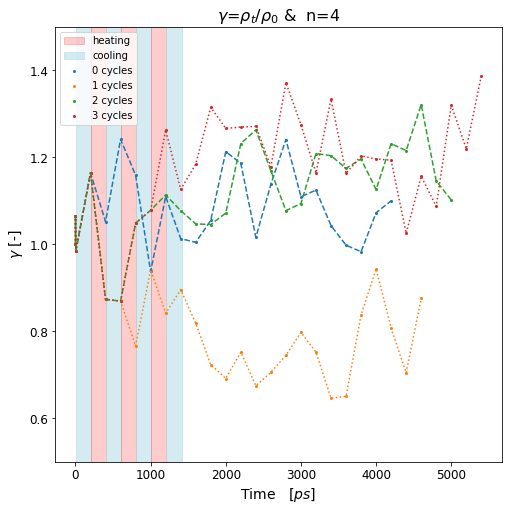

In [132]:
plt.figure(figsize=(8, 8))
plt.ylim(0.5,1.5)

print(gamma_t)
print(timestep)
#print(gamma_cycle)
plt.fill_between([10,210.9],[1.5,1.5] ,color='lightblue', alpha=0.5)
plt.fill_between([211,410.9],[1.5,1.5] ,color='red', alpha=0.2)
plt.fill_between([411,610.9],[1.5,1.5] ,color='lightblue', alpha=0.5)
plt.fill_between([610,810.9],[1.5,1.5] ,color='red', alpha=0.2)
plt.fill_between([811,1010.9],[1.5,1.5] ,color='lightblue', alpha=0.5)
plt.fill_between([1011,1210.9],[1.5,1.5] ,color='red', alpha=0.2, label='heating')
plt.fill_between([1211,1411.9],[1.5,1.5] ,color='lightblue', alpha=0.5, label='cooling')


alpha1=['--',':','--',':']
for i in range(4): 
    timestep1 = [x*0.0002 for x in timestep[i]]
    plt.scatter(timestep1, gamma_cycle[i],s=4, label='%d cycles'%i)
    plt.plot(timestep1,gamma_cycle[i], linestyle=alpha1[i])
#plt.scatter(timestep[i],gammap, label='initial - structure results')
#plt.plot(timestep[i],gammap)
plt.title(r'$\gamma$=$\rho_t$/$\rho_0$ &  n=%d'%(n-1), fontsize=16)
plt.xlabel('Time   [$ps$] ', fontsize=14)
plt.ylabel(r'$\gamma$ [-]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()
plt.show()